In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
import scipy
import os
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

os.chdir('/data/des41.a/data/jaortiz/snana-test/')
from python_all.python_utilities.des_io import parse_observations
from python_all.parse_simlib import parse_simlib

os.chdir('/data/des41.a/data/jaortiz/snana-test/do_swaps/')
from parse_dump import findall_KN 

In [10]:
DIR = '/data/des41.b/data/SNDATA_ROOT/SIM/GW170817_AT2017gfo_LSST_WFD/'
#get KN locations of simulated events in snana
file_count = len([f for f in os.walk(DIR).next()[2] if f[-4:] == ".DAT"])
KN_locations_found = np.zeros([file_count, 3])

# run through all .dat files in the specified directory and get time and location of KN
file_num = 0
for file in os.listdir(DIR):  
    if file.endswith(".DAT"):
        obs, headerdict = parse_observations(DIR + file)
        KN_locations_found[file_num,:] = [headerdict['PEAKMJD'], headerdict['RA'], headerdict['DECL']]
        file_num += 1    
print 'Number of KN observed by snana: ', len(KN_locations_found)

        
KN_locations = findall_KN()


Number of KN observed by snana:  515
Number of simulations:  3394


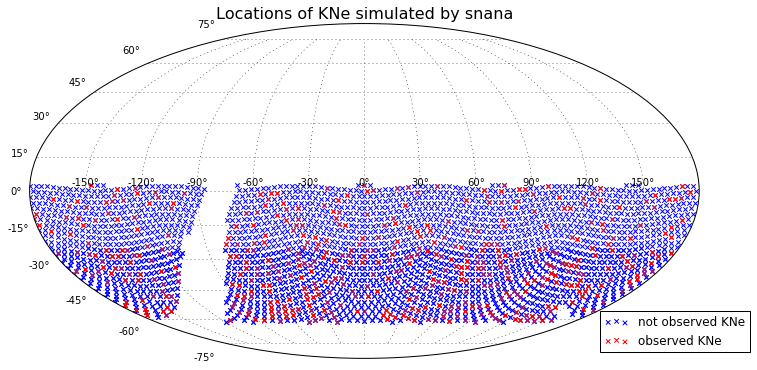

In [11]:
""" RA:      0.000  to   358.476 deg 
    DEC:  -62.021  to   -10.722 deg """

ra = Angle(KN_locations[:,1]*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = Angle(KN_locations[:,2]*u.degree)

fra = Angle(KN_locations_found[:,1]*u.degree)
fra = fra.wrap_at(180*u.degree)
fdec = Angle(KN_locations_found[:,2]*u.degree)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian, marker='x', label='not observed KNe')
ax.scatter(fra.radian, fdec.radian, marker='x', color='r', label='observed KNe')
ax.grid(True)

plt.title('Locations of KNe simulated by snana', size=16)
plt.legend(loc='lower right', bbox_to_anchor=(1.085, 0))

os.chdir('/data/des41.a/data/jaortiz/snana-test/')
#fig.savefig('figures/KN_locs')


In [12]:
simlib = '/data/des41.a/data/jaortiz/snana-test/simlibs/minion_1016_WFD.simlib'
libid_details, pointings_arr = parse_simlib(simlib)


2293 2293


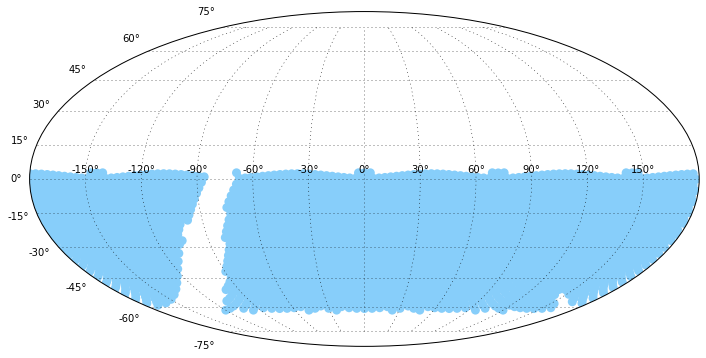

In [60]:
#pointings = pointings_arr[0:2000]

for i, libid in enumerate(libid_details):
    lib_arr = (np.array(libid)).astype(float)
    if i==0:
        libids_arr = lib_arr
    else:
        libids_arr = np.vstack((libids_arr, lib_arr))

ara = Angle(libids_arr[:,1]*u.degree)
ara = ara.wrap_at(180*u.degree)
adec = Angle(libids_arr[:,2]*u.degree)
print len(ara), len(adec)

fig1 = plt.figure(figsize=(12,10))
ax = fig1.add_subplot(111, projection="mollweide")
ax.scatter(ara.radian, adec.radian, edgecolors='none', s=80, color='lightskyblue')
ax.grid(True)

#plt.title('Locations of LSST observations', size=16)
# plt.legend(loc='lower right', bbox_to_anchor=(1.07, 0))

os.chdir('/data/des41.a/data/jaortiz/snana-test/')
fig1.savefig('figures/LSST_observations')